In [1]:
import arms
import numpy as np
import matplotlib.pyplot as plt
from tracker import Tracker2, SWTracker, DiscountTracker
from MAB import GenericMAB as GMAB
%matplotlib inline  
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300
%load_ext autoreload
%load_ext memory_profiler
%autoreload 2
from utils import plot_mean_arms, traj_arms
marker_list = ["o","v","*","s"]
color_list = ['blue','red','orange', 'c', 'm', 'green']

# Fixed variance $\sigma^2 = 0.5$

In [2]:
# TS algorithms
arm_start, param_start = ['G', 'G', 'G'], [[0.9,0.5], [0.5,0.5], [0.4,0.5]]
chg_dist = {'2500': [['G', 'G', 'G'], [[0.4,0.5], [0.8,0.5], [0.5,0.5]]],
            '4500': [['G', 'G', 'G'], [[0.3,0.5], [0.2,0.5], [0.7,0.5]]],
            '7000': [['G', 'G', 'G'], [[0.9,0.5], [0.8,0.5], [0.4,0.5] ]]
           }

mab = GMAB(arm_start, param_start, chg_dist)


T = 10000
nb_change = 4
Gamma_T_garivier = 3
reward_u_p = 1
sigma_max = 0.5
gamma_EXP3 = min(1, np.sqrt(mab.nb_arms*(nb_change*np.log(mab.nb_arms*T)+np.exp(1))/((np.exp(1)-1)*T)))
gamma_D_UCB = 1 - 1/(4*reward_u_p)*np.sqrt(Gamma_T_garivier/T)
gamma_D_UCB_unb = 1 - 1/(4*(reward_u_p+ 2*sigma_max))*np.sqrt(Gamma_T_garivier/T)
tau_theorique = 2*reward_u_p*np.sqrt(T*np.log(T)/Gamma_T_garivier)
tau_theorique_unb = 2*(reward_u_p + 2*sigma_max)*np.sqrt(T*np.log(T)/Gamma_T_garivier)
tau_no_log = 2*reward_u_p*np.sqrt(T/Gamma_T_garivier)

In [5]:
N = 2000
print('gamma_D_UCB:', 1/(1-gamma_D_UCB))
print('tau:', tau_theorique)

reg_UCB1_n_2 = mab.MC_regret('UCB1', N, T, {'C': sigma_max* np.sqrt(2)},store_step=1)
reg_EXP3S_n_2 = mab.MC_regret("EXP3S", N, T, {'alpha':1/T, 'gamma': gamma_EXP3}, store_step=1)
reg_DUCB_n_2 = mab.MC_regret('D_UCB', N, T, {'B':sigma_max*1/2,'ksi':2, 'gamma': gamma_D_UCB_unb}, store_step=1)
reg_SWUCB_n_2 = mab.MC_regret('SW_UCB', N, T, {'C': sigma_max*np.sqrt(2), 'tau': int(tau_theorique_unb)},store_step=1)
reg_SW_TS_n_2 = mab.MC_regret('SW_TS_gaussian', N, T, {'mu_0':0.5, 'sigma_0':0.5, 'sigma':0.5, 'tau': int(tau_theorique)},store_step=1)
reg_D_TS_n_2 = mab.MC_regret('DTS_gaussian', N, T, {'mu_0':0.5, 'sigma_0':0.5, 'sigma':0.5, 'gamma': gamma_D_UCB},store_step=1)
reg_LBSDA_n_2 = mab.MC_regret('LB_SDA', N, T, {'tau': int(tau_theorique)}, store_step=1)

Computing 2000 simulations:   0%|          | 1/2000 [00:00<06:34,  5.06it/s]

gamma_D_UCB: 230.9401076758492
tau: 350.4347846504621


Computing 2000 simulations: 100%|██████████| 2000/2000 [17:19<00:00,  1.92it/s]


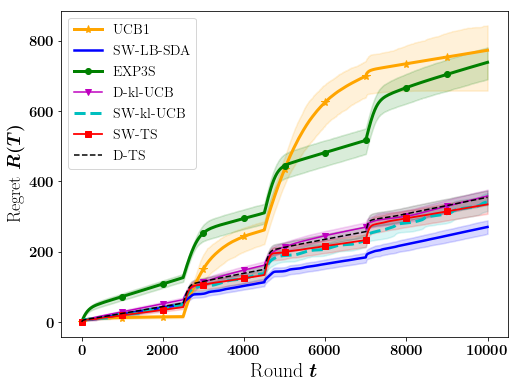

In [7]:
import matplotlib
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc("lines", linewidth=3)
matplotlib.rc('xtick', labelsize=15)
matplotlib.rc('ytick', labelsize=15)
matplotlib.rc('font', weight='bold')
matplotlib.rcParams['text.latex.preamble'] = [r"\usepackage{amsmath} \boldmath"]


t_saved = [i for i in range(T)]


#for keys in chg_dist:
#    print(keys)
#    plt.axvline(keys, color='red', linestyle='--', lw=1)
    
    
plt.figure(figsize=(8,6))


    
plt.plot(reg_UCB1_n_2[0], color = "orange", marker = "*", markevery = 1000, markersize = 8, label = 'UCB1')
plt.fill_between(t_saved, np.quantile(reg_UCB1_n_2[1], q= 0.25, axis=1), np.quantile(reg_UCB1_n_2[1], q= 0.75, axis=1), 
                 alpha=0.15, linewidth=1.5, color="orange")

plt.plot(reg_LBSDA_n_2[0], color = "blue",  linewidth=2.5, label= "SW-LB-SDA")
plt.fill_between(t_saved, np.quantile(reg_LBSDA_n_2[1], q= 0.25, axis=1), 
                 np.quantile(reg_LBSDA_n_2[1], q= 0.75, axis=1), color = "blue",  linewidth=1.5, alpha=0.15)
plt.plot(reg_EXP3S_n_2[0], color = "green",marker = 'o', markevery= 1000, label = 'EXP3S')
plt.fill_between(t_saved, np.quantile(reg_EXP3S_n_2[1], q= 0.25, axis=1), 
                 np.quantile(reg_EXP3S_n_2[1], q= 0.75, axis=1), color = "green",  linewidth=1.5, alpha=0.15)
plt.plot(reg_DUCB_n_2[0], color = "m", marker= "v", linewidth = 1.5, markevery=1000, label = 'D-kl-UCB')
plt.fill_between(t_saved, np.quantile(reg_DUCB_n_2[1], q= 0.25, axis=1), 
                 np.quantile(reg_DUCB_n_2[1], q= 0.75, axis=1), color = "m",  linewidth=1.5, alpha=0.15)

plt.plot(reg_SWUCB_n_2[0], color = "c", linestyle = "--", markevery=1000,label= "SW-kl-UCB")
plt.fill_between(t_saved, np.quantile(reg_SWUCB_n_2[1], q= 0.25, axis=1), 
                 np.quantile(reg_SWUCB_n_2[1], q= 0.75, axis=1), color = "c",  linewidth=1.5, alpha=0.15)

plt.plot(reg_SW_TS_n_2[0], color = "red",  linewidth = 1.8, 
         linestyle = "-", marker = 's', markevery=1000,label= "SW-TS")
plt.fill_between(t_saved, np.quantile(reg_SW_TS_n_2[1], q= 0.25, axis=1), 
                 np.quantile(reg_SW_TS_n_2[1], q= 0.75, axis=1), color = "red",  linewidth=1.5, alpha=0.15)
plt.plot(reg_D_TS_n_2[0], color = "black", linewidth = 1.5, linestyle="--",label= "D-TS")
plt.fill_between(t_saved, np.quantile(reg_D_TS_n_2[1], q= 0.25, axis=1), 
                 np.quantile(reg_D_TS_n_2[1], q= 0.75, axis=1), color = "black",  linewidth=1.5, alpha=0.15)


    
plt.legend(loc=2, fontsize=14).draw_frame(True)
plt.xlabel(r'Round $\boldsymbol{t}$', fontsize=20)
plt.ylabel(r'Regret $\boldsymbol{R(T)}$', fontsize=18)



#plt.show()
plt.savefig('final_gaussian.png', dpi = 200, bbox_inches='tight')

# Evolving variance

In [2]:
arm_start, param_start = ['G', 'G', 'G'], [[0.9,0.5], [0.5,0.5], [0.4,0.5]]
chg_dist = {'2500': [['G', 'G', 'G'], [[0.4,0.25], [0.8,0.25], [0.5,0.25]]],
            '4500': [['G', 'G', 'G'], [[0.3,1], [0.2,1], [0.7,1]]],
            '7000': [['G', 'G', 'G'], [[0.9,0.5], [0.8,0.5], [0.4,0.5] ]]
           }

mab = GMAB(arm_start, param_start, chg_dist)


T = 10000
nb_change = 4
Gamma_T_garivier = 3
reward_u_p = 1
gamma_EXP3 = min(1, np.sqrt(mab.nb_arms*(nb_change*np.log(mab.nb_arms*T)+np.exp(1))/((np.exp(1)-1)*T)))
gamma_D_UCB = 1 - 1/(4*reward_u_p)*np.sqrt(Gamma_T_garivier/T)
gamma_D_UCB_unb = 1 - 1/(4*(reward_u_p+ 2))*np.sqrt(Gamma_T_garivier/T)
tau_theorique = 2*reward_u_p*np.sqrt(T*np.log(T)/Gamma_T_garivier)
tau_theorique_unb = 2*(reward_u_p + 2)*np.sqrt(T*np.log(T)/Gamma_T_garivier)
tau_no_log = 2*reward_u_p*np.sqrt(T/Gamma_T_garivier)

In [5]:
N = 2000
sigma_max = 1
print('gamma_D_UCB:', 1/(1-gamma_D_UCB))
print('gamma_D_UCB_unb', 1/(1-gamma_D_UCB_unb))
print('tau:', tau_theorique)
print('tau_th_unbounded:', tau_theorique_unb)

reg_UCB1 = mab.MC_regret('UCB1', N, T, {'C': sigma_max* np.sqrt(2)}, store_step=1)
reg_EXP3S = mab.MC_regret("EXP3S", N, T, {'alpha':1/T, 'gamma': gamma_EXP3}, store_step=1)
reg_DUCB = mab.MC_regret('D_UCB', N, T, {'B':sigma_max*1/2,'ksi':2, 'gamma': gamma_D_UCB_unb}, store_step=1)
reg_SWUCB = mab.MC_regret('SW_UCB', N, T, {'C': sigma_max*np.sqrt(2), 'tau': int(tau_theorique_unb)},store_step=1)
reg_SW_TS = mab.MC_regret('SW_TS_gaussian', N, T, {'mu_0':0.5, 'sigma_0':sigma_max, 'sigma':sigma_max, 'tau': int(tau_theorique)},store_step=1)
reg_D_TS = mab.MC_regret('DTS_gaussian', N, T, {'mu_0':0.5, 'sigma_0':sigma_max, 'sigma':sigma_max, 'gamma': gamma_D_UCB},store_step=1)
reg_LBSDA = mab.MC_regret('LB_SDA', N, T, {'tau': int(tau_theorique)}, store_step=1)

Computing 2000 simulations:   0%|          | 0/2000 [00:00<?, ?it/s]

gamma_D_UCB: 230.9401076758492
gamma_D_UCB_unb 692.8203230275653
tau: 350.4347846504621
tau_th_unbounded: 1051.3043539513865


Computing 2000 simulations: 100%|██████████| 2000/2000 [17:35<00:00,  1.90it/s]


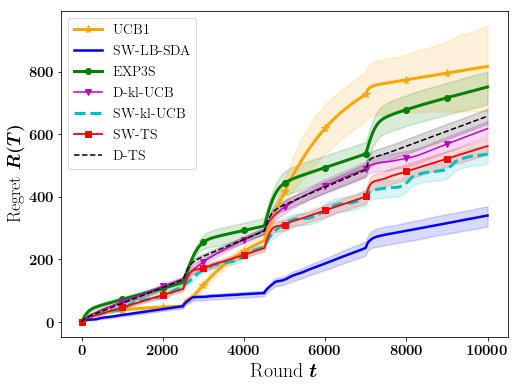

In [7]:
import matplotlib
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc("lines", linewidth=3)
matplotlib.rc('xtick', labelsize=15)
matplotlib.rc('ytick', labelsize=15)
matplotlib.rc('font', weight='bold')
matplotlib.rcParams['text.latex.preamble'] = [r"\usepackage{amsmath} \boldmath"]


t_saved = [i for i in range(T)]

    
plt.figure(figsize=(8,6))

    
plt.plot(reg_UCB1[0], color = "orange", marker = "*", markevery = 1000, markersize = 8, label = 'UCB1')
plt.fill_between(t_saved, np.quantile(reg_UCB1[1], q= 0.25, axis=1), np.quantile(reg_UCB1[1], q= 0.75, axis=1), 
                 alpha=0.15, linewidth=1.5, color="orange")

plt.plot(reg_LBSDA[0], color = "blue",  linewidth=2.5, label= "SW-LB-SDA")
plt.fill_between(t_saved, np.quantile(reg_LBSDA[1], q= 0.25, axis=1), 
                 np.quantile(reg_LBSDA[1], q= 0.75, axis=1), color = "blue",  linewidth=1.5, alpha=0.15)

plt.plot(reg_EXP3S[0], color = "green",marker = 'o', markevery= 1000, label = 'EXP3S')
plt.fill_between(t_saved, np.quantile(reg_EXP3S[1], q= 0.25, axis=1), 
                 np.quantile(reg_EXP3S[1], q= 0.75, axis=1), color = "green",  linewidth=1.5, alpha=0.15)

plt.plot(reg_DUCB[0], color = "m", marker= "v", linewidth = 1.5, markevery=1000, label = 'D-kl-UCB')
plt.fill_between(t_saved, np.quantile(reg_DUCB[1], q= 0.25, axis=1), 
                 np.quantile(reg_DUCB[1], q= 0.75, axis=1), color = "m",  linewidth=1.5, alpha=0.15)

plt.plot(reg_SWUCB[0], color = "c", linestyle = "--", markevery=1000,label= "SW-kl-UCB")
plt.fill_between(t_saved, np.quantile(reg_SWUCB[1], q= 0.25, axis=1), 
                 np.quantile(reg_SWUCB[1], q= 0.75, axis=1), color = "c",  linewidth=1.5, alpha=0.15)

plt.plot(reg_SW_TS[0], color = "red",  linewidth = 1.8, 
         linestyle = "-", marker = 's', markevery=1000,label= "SW-TS")
plt.fill_between(t_saved, np.quantile(reg_SW_TS[1], q= 0.25, axis=1), 
                 np.quantile(reg_SW_TS[1], q= 0.75, axis=1), color = "red",  linewidth=1.5, alpha=0.15)

plt.plot(reg_D_TS[0], color = "black", linewidth = 1.5, linestyle="--",label= "D-TS")
plt.fill_between(t_saved, np.quantile(reg_D_TS[1], q= 0.25, axis=1), 
                 np.quantile(reg_D_TS[1], q= 0.75, axis=1), color = "black",  linewidth=1.5, alpha=0.15)


    
plt.legend(loc=2, fontsize=14).draw_frame(True)
plt.xlabel(r'Round $\boldsymbol{t}$', fontsize=20)
plt.ylabel(r'Regret $\boldsymbol{R(T)}$', fontsize=18)



#plt.show()
plt.savefig('final_gaussian_varying.png', dpi = 200, bbox_inches='tight')